# How to retain high performing employees

The purpose of this analysis is to help a company understand why its employees are leaving and how to improve retention for high performing ones. For this, we'll use a dataset containing records for 14 999 employees and the 9 following attributes:
- **satisfaction_level:** employee satisfaction rating, raging from 0 to 1, with 1 indicating the highest satisfaction level
- **last_evaluation:** employee performance rating, raging from 0 to 1, with 1 indicating the highest satisfaction level
- **number_project:** the number of projects the employee worked on
- **average_monthly_hours:** the average number of hours worked each month
- **time_spend_company:** the number of years spent at the company
- **Work_accident:** wether (1) or not (0) the employee has been involved in a work accident
- **left:** wether (1) or not (0) the employee has left the company
- **promotion_last_5years:** wether (1) or not (0) the employee has been promoted at least once in the past 5 years
- **department:** the department the employee is working in
- **salary:** the employee salary, raging across "low", "medium", "high" 

## Data Analysis

### Data Preparation

In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

After importing the csv file, we can display the first 5 rows to see what the data looks like.
Notice that the **department** feature is actually called **sales** in this dataset.

In [154]:
TRAIN_FILE = 'HR_comma_sep.csv'
df = pd.read_csv(TRAIN_FILE, sep=',', header=0) 
df.head(n=5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


The attributes **sales** and **salary** are of type category, as they can take only a limited amount of values. We'll transform this columns to the correct type, in order to be able to easily group by later.

In [155]:
df["salary"] = df["salary"].astype("category")
df["sales"] = df["sales"].astype("category")

### Exploratory Analysis

Let's first take a quick look at some statistics.

The average satisfaction level of employees is at 0.61, with only 25% rating it higher than 0.82 and other 25% rating it lower than 0.44. The last evaluation rating shows that the top 25% employees have a rating of over 0.87; we can later use this value in order to focus our study on high performing employees. Furthemore, we notice that on average employees work on almost 4 projects during the time frame allocated to this dataset. The average of monthly worked hours is around 200 hours, however it is important to notice that the variance is very high. Employees spend on average between 3 and 4 years at the company, while the most experienced employee has 10 years with the company. 14% of employees were involved in a work accident and only 2% were promoted in the last 5 years, which looks pretty low.

Eventually, the turnover rate over the period of time described in this dataset is 24%. The average turnover rate depends on departments, but this looks rather high.


In [32]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


With a **correlation matrix**, we can have a quick estimation of which attributes are correlated and focus our study on those.

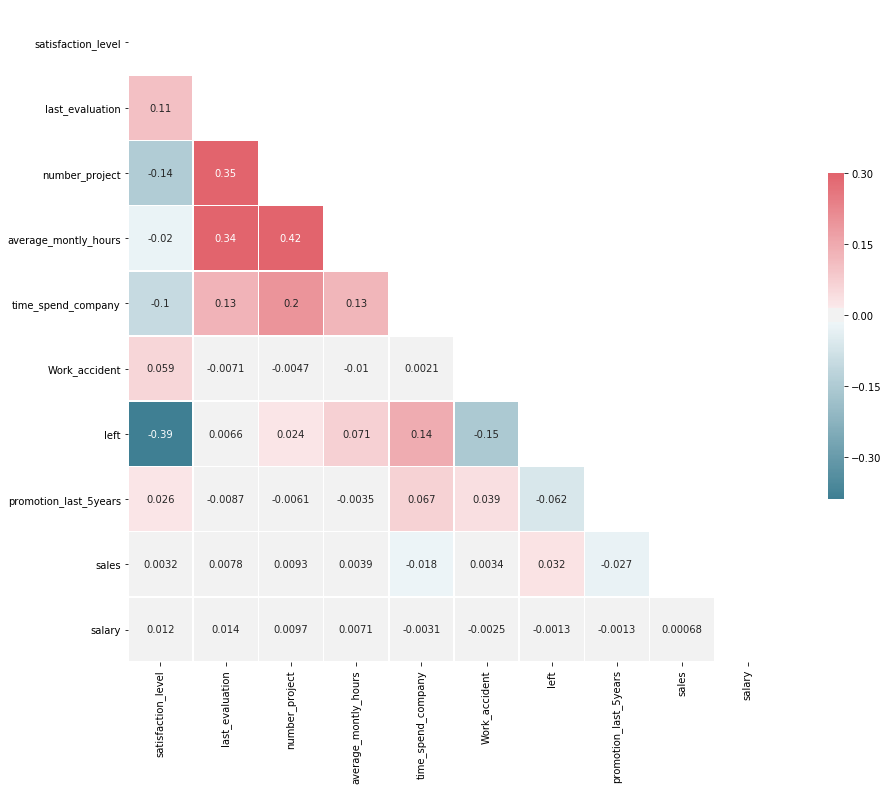

In [241]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(17, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

According to this correlation matrix, we can deduce that the turnover rate is negatively correlated with the satisfaction level (-0.39). However, other correlations are quite small.

We can now further analyze the impact of the satisfaction rate on the turnover, by comparing it in the different deparments. 
The two plots below state that the departments with the highest turnover rates, almost 30%, are HR and Accounting, and these are also the departments with the lowest average satisfaction rate. Whereas management and R&D have the highest satisfaction level, as well as the lowest turnover rate.

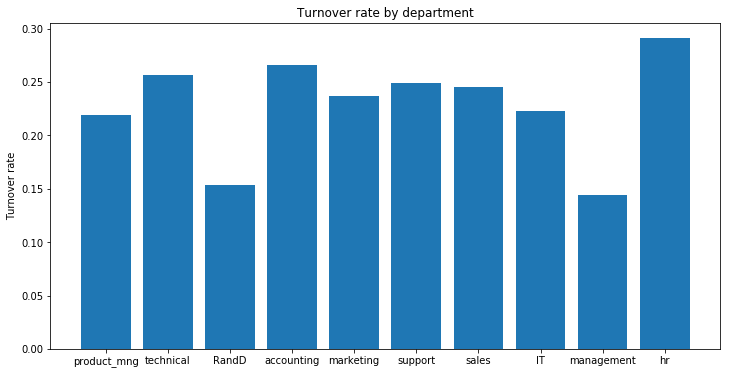

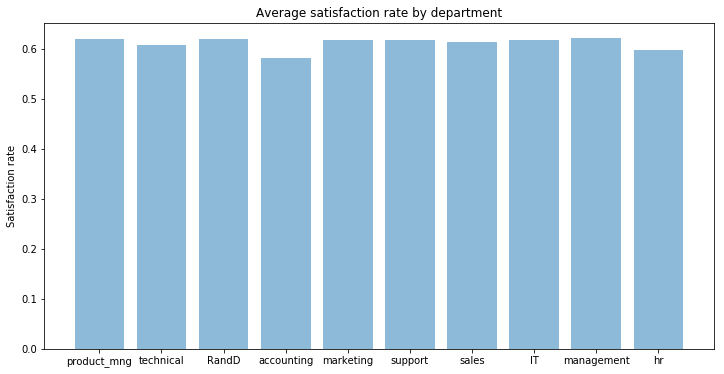

In [197]:
turnover_per_dept = df.groupby(["sales"])["left"].sum()/df.groupby(["sales"])["left"].count()
departments = leftDf.sales.unique()
satisfaction_per_depart = df.groupby(["sales"])["satisfaction_level"].mean()

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
plt.bar(departments, turnover_per_dept)
plt.xticks(departments)
plt.ylabel("Turnover rate")
plt.title("Turnover rate by department")
fig2, ax = plt.subplots()
fig2.set_size_inches(12, 6)
plt.bar(departments,satisfaction_per_depart, alpha=0.5)
plt.xticks(departments)
plt.ylabel("Satisfaction rate")
plt.title("Average satisfaction rate by department")
plt.show()

We can conclude that the employees who leave have in general a lower satisfaction level, however in order to continue this analysis, we'll have to subset our data and select only the high performing employees. This will allow us to have more details as to why they are leaving. 

As the top 25% employees have an evaluation rating superior to 0.87, we'll use that value to select the employees we want to retain the most.

### Focus on high perfomring employees

In [243]:
top_employees = df.loc[df["last_evaluation"] > 0.87]
top_employees.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000,3519.000000
mean,0.635357,0.939471,4.258880,218.701051,3.798806,0.134982,0.313157,0.017619,6.001421,1.374538
std,0.272904,0.037461,1.171866,46.757869,1.487063,0.341752,0.463844,0.131579,2.830386,0.597122
min,0.090000,0.880000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.520000,0.910000,3.000000,181.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.720000,0.940000,4.000000,228.000000,4.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.840000,0.970000,5.000000,256.000000,5.000000,0.000000,1.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


What we can already notice, is that these employees work on average more than the 210 monthly hours previously found, they also work on more projects. However, the turnover rate is 31%, which is why it is important to find how to retain them.

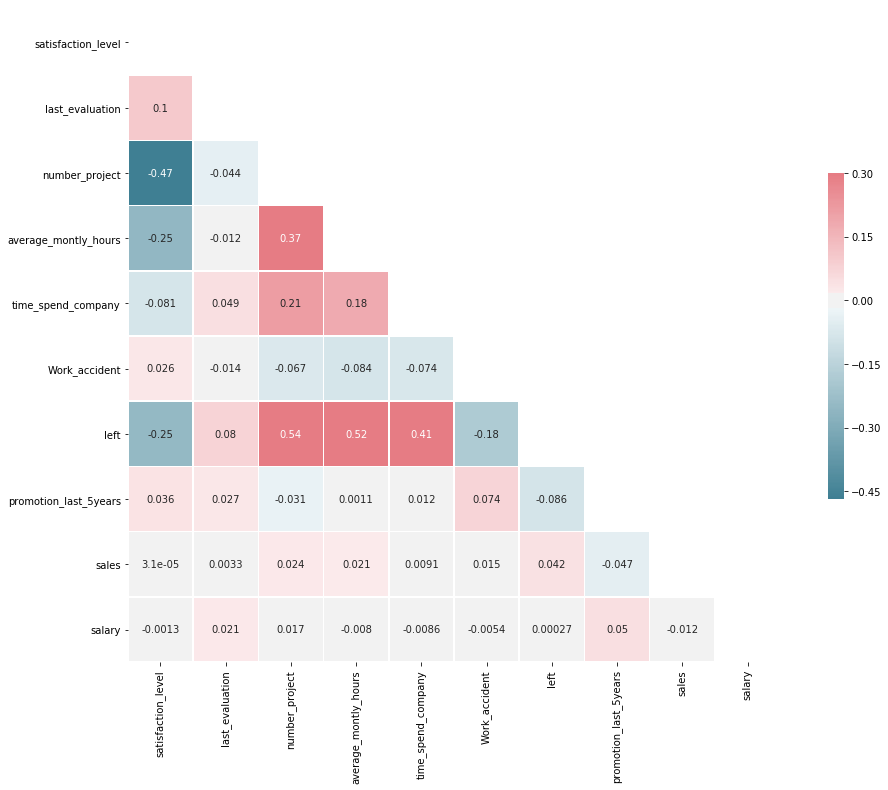

In [245]:
corr = top_employees.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(17, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

The correlation matrix above shows us that people who left, also worked many hours on numerous projects, and have spent quite some time with the company. Their satisfaction level is also lower. If we look at the satisfaction level correlations, we see that people with low satisfaction tend to have a high number of projects which goes with what we found for the left attribute.

Let's take a look at the salary variable now.

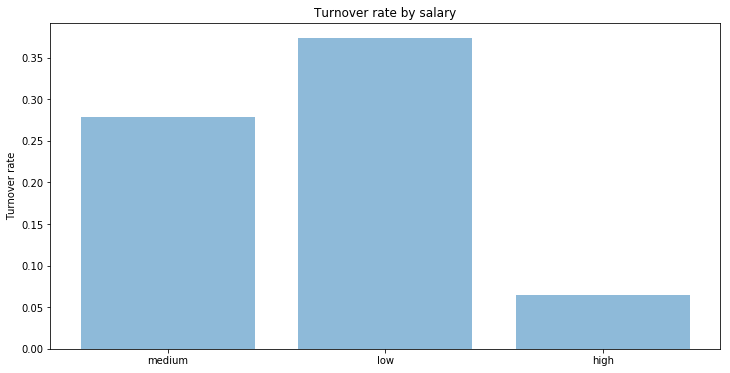

In [213]:
turnover_per_salary = top_employees.groupby(["salary"])["left"].sum()/top_employees.groupby(["salary"])["left"].count()
salary = top_employees.salary.unique()

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

plt.bar(salary, turnover_per_salary, align="center", alpha=0.5)
plt.xticks(salary)
plt.ylabel("Turnover rate")
plt.title("Turnover rate by salary")
plt.show()

Unsurprisingly, the turnover rate is much higher for low salaries than for high.

## Predictive model

We will now build a model which will allow us to predict as accurately as possible which employee is at risk of leaving the company. For this, we will use a random forest classifier. The number of trees has been chosen in order to optimize the prediciton score.

As the attributes **salary** and **sales** are not numerical, we will first use a label encoder in order to transform them in numerical values.

In [214]:
department_encoder = preprocessing.LabelEncoder()
department_encoder.fit_transform(df.sales.unique())
df["sales"] = department_encoder.fit_transform(df.sales)
df["salary"] = department_encoder.fit_transform(df.salary)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


### Test and training datasets
80% of the dataset will go into the training set, while the remaining 20% will go into the test set which will allow us to test our model.

In [215]:
X = df.drop('left', 1).values
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the model

In [258]:
classifier = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators = 25)
t_start = time.clock()
classifier.fit(X_train, y_train)
t_end = time.clock()
t_diff = t_end - t_start
train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

print('Train score : {}'.format(train_score))
print('Test score : {}'.format(test_score))
print('Time : {} ms'.format(round(t_diff,2)))

Train score : 0.9993332777731477
Test score : 0.9923333333333333
Time : 0.14 ms


Using a random forest with 25 trees allows us to atteign a test score of 99.23%. As this is a very high score, we'll keep this model to predict which employees are at risk of leaving.

### Results

We notice that the most important attributes in deciding which employee will leave and which will stay are the satisfaction level, followed by the number of projects, the average number of worked hours, the last evaluation rating and the time spent in the company. The salary and promotion are less important.

In [259]:
features = ['satisfaction_level','time_spend_company','average_montly_hours','last_evaluation','number_project','department','Work_accident','promotion_last_5years','salary']
for feat, importance in list(zip(features, classifier.feature_importances_)):
    print('{} : {}%'.format(feat, round(importance*100,2)))

satisfaction_level : 32.93%
time_spend_company : 13.0%
average_montly_hours : 17.82%
last_evaluation : 15.16%
number_project : 18.29%
department : 0.48%
Work_accident : 0.1%
promotion_last_5years : 1.26%
salary : 0.95%


The code below predicts which employee is at risk of leaving among those who have an evaluation rate of over 0.87.
The result gives the employee id, corresponding to the index of the original dataframe.

In [276]:
top_empl = df.loc[df["left"] == 0]
top_empl = top_empl.loc[top_empl["last_evaluation"] > 0.87]
top_empl_predict = top_empl.drop('left', 1).values
predictions = classifier.predict(top_empl_predict)
preds = [round(p) for p in predictions]
for a, p in zip(top_empl.index.values, preds):
    if p==1:
        print("Employee {} has 100% risk of leaving".format(a))



Employee 3780 has 100% risk of leaving
Employee 4769 has 100% risk of leaving
Employee 5697 has 100% risk of leaving


In [288]:
df.iloc[[5697,3780,4769],:]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
5697,0.81,0.98,6,196,2,0,0,0,8,1
3780,0.86,0.96,5,238,5,0,0,0,9,1
4769,0.13,0.95,5,149,2,0,0,0,9,1


These employees show a very high evaluation rating, but low satisfaction, overwork and low salary as well as promotions.